In [416]:
import pandas as pd

In [417]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States"

In [418]:
#load the data from wikipedia
wiki_dfs = pd.read_html(wiki_url)

In [419]:
# remove the last item (wikipedia related items)
dont_care = wiki_dfs.pop()

In [420]:
#remove wiki's summary cells 
del wiki_dfs[13]
del wiki_dfs[13] #cell 14 becomes 13 after the last command, so it looks dumb

In [421]:
#fix the one table where they didn't label description
wiki_dfs[11]["Description"] = wiki_dfs[11]["Unnamed: 5"]
wiki_dfs[11].drop(columns=['Unnamed: 5'], inplace=True)

In [422]:
#join (union) all of  the dfs ( tables from the wikipedia table ) to one df
#list comprehension used in the concat function rather than listing all dfs manually
all_shootings_df  = pd.concat([  df for df in wiki_dfs ])

In [423]:
#set index to date
#all_shootings_df = all_shootings_df.set_index("Date")

In [424]:
#split out the dead notes
all_shootings_df[['Dead New','Dead Notes 1','Dead Notes 2']] = all_shootings_df.Dead.str.split("[",expand=True)
all_shootings_df['Dead Notes 1'] = all_shootings_df['Dead Notes 1'].str.replace("]", "")
all_shootings_df['Dead Notes 2'] = all_shootings_df['Dead Notes 2'].str.replace("]", "")

In [425]:
#fix the dates - hacky
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 21–25, 1969', 'May 21, 1969–May 25, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 23–24, 1968', 'July 23, 1968–July 24, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 27–29, 1999', 'July 27, 1999–July 29, 1999')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('January 19–20, 2010', 'January 19, 2010–January 20, 2010')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 3–12, 2013', 'February 3, 2013–February 12, 2013')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 31 – June 1, 1921', 'May 31, 1921–June 1, 1921')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 5 –May 6, 2016', 'May 5, 2016–May 6, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 21 –April 22, 2016', 'April 21, 2016–April 22, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 30–June 4, 2018', 'May 30, 2018–June 4, 2018')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('March 7 – 8, 2016', 'March 7, 2016–March 8, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 13 –April 18, 2017', 'April 13, 2017–April 18, 2017')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('June 17–18, 1990', 'June 17, 1990–June 18, 1990')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 16 – October 23, 2002', 'February 16, 2002–October 23, 2002')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('January 1923','January 01, 1923')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('December 22–28, 1987','December 22, 1987– December 28, 1987')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('June 21–22, 1922','June 21, 1922–June 22, 1922')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 2–4, 1999','July 2, 1999 – July 4, 1999')

In [426]:
#find start and end dates 
all_shootings_df['Date']=all_shootings_df.Date.str.strip()
all_shootings_df['Date']=all_shootings_df.Date.str.replace("-","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df[['Date Start','Date End']]=all_shootings_df.Date.str.split("–",expand=True)
all_shootings_df['Date Start']=all_shootings_df['Date Start'].str.strip()
all_shootings_df['Date End']=all_shootings_df['Date End'].str.strip()

In [427]:
# change dates to actual dates
all_shootings_df['Date Start'] = pd.to_datetime(all_shootings_df['Date Start'], format='%B %d, %Y')
all_shootings_df['Date End'] = pd.to_datetime(all_shootings_df['Date End'], format='%B %d, %Y')

In [428]:
#delete the orginal date 
all_shootings_df.drop(columns=['Date'], inplace=True)

In [429]:
# replace dead new with dead and split dead min and max
all_shootings_df['Dead'] = all_shootings_df['Dead New']

In [430]:
#drop dead new
all_shootings_df.drop(columns=['Dead New'], inplace=True)

In [431]:
#split dead min and max
all_shootings_df[['Dead Min','Dead Max']] = all_shootings_df.Dead.str.split("-",expand=True)

In [432]:
#Drop Dead 
all_shootings_df.drop(columns=['Dead'], inplace=True)

In [433]:
#split out the Injured notes
all_shootings_df[['Injured New','Injured Notes 1','Injured Notes 2']] = all_shootings_df.Injured.str.split("[",expand=True)
all_shootings_df['Injured Notes 1'] = all_shootings_df['Injured Notes 1'].str.replace("]", "")
all_shootings_df['Injured Notes 2'] = all_shootings_df['Injured Notes 2'].str.replace("]", "")
# replace dead new with dead and split dead min and max
all_shootings_df['Injured'] = all_shootings_df['Injured New']
all_shootings_df.drop(columns=['Injured New'], inplace=True)
#split Injured min and max
all_shootings_df[['Injured Min','Injured Max']] = all_shootings_df.Injured.str.split("-",expand=True)
#injured has some unknowns and a + on some columns
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("+", "")
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("unknown", "0")

#Drop Injured 
all_shootings_df.drop(columns=['Injured'], inplace=True)

In [434]:
#average the dead as float
all_shootings_df['Dead Average'] = all_shootings_df[['Dead Min','Dead Max']].astype(float).mean(axis=1)

In [435]:
#average the injured as float
all_shootings_df['Injured Average'] = all_shootings_df[['Injured Min','Injured Max']].astype(float).mean(axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, 1528070400000000000, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, 1492473600000000000, --, --, --, --, --,
                   --, --, --, --, --, --, --, 1462492800000000000,
                   1461283200000000000, --, 1457395200000000000, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --,
                   1360627200000000000, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   1263945600000000000, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --,
                   1035331200000000000, --, --, --, --, --, --, --, --,
                   --, --, 933206400000000000, 931046400000000000, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, 645667200000000000,
                   --, --, --, --, --, --, --, 567648000000000000, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --,
                   95212800000000000, --, --, --, --, --,
                   -19094400000000000, -13910400000000000, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   -1499904000000000000, -1533254400000000000, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True, False,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True, False, False,  True, False,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True, False,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True, False,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True, False,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                   False, False,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True, False,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True, False,  True,
                    True,  True,  True,  True, False, False,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                   False, False,  True],
       fill_value=numpy.datetime64('NaT'),
            dtype='datetime64[ns]')

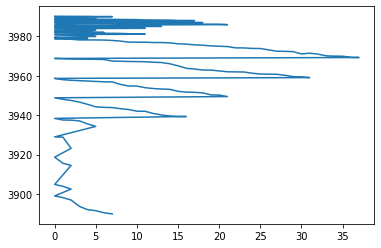

In [436]:
all_shootings_df.plot()

In [437]:
all_shootings_df.sort_index(inplace=True)


,Location,Total,Description,Dead Notes 1,Dead Notes 2,Date Start,Date End,Dead Min,Dead Max,Injured Notes 1,Injured Notes 2,Injured Min,Injured Max,Dead Average,Injured Average
0,"Indianapolis, Indiana",16,Indianapolis FedEx shooting: early reports sta...,n 1,None,2021-04-15,NaT,9,None,None,None,7,None,9.0,7.0
0,"Greensboro, North Carolina",17,Greensboro Massacre (1979): Members of the Com...,None,None,1979-11-03,NaT,5,None,NaN,NaN,NaN,NaN,5.0,NaN
0,"Louisville, Kentucky",21,Standard Gravure shooting (1989): A 47-year-ol...,n 1,None,1989-09-14,NaT,9,None,None,None,12,None,9.0,12.0
0,"Townville, South Carolina",5,Townville Elementary School shooting: A fourte...,None,None,2016-09-28,NaT,2,None,NaN,NaN,NaN,NaN,2.0,NaN
0,"Greensboro, North Carolina",29,"1969 Greensboro uprising: Student protestors, ...",None,None,1969-05-21,1969-05-25,2,None,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,"Santee, California",15,Santana High School shooting: A 15-year-old st...,None,None,2001-03-05,NaT,2,None,None,None,13,None,2.0,13.0
34,"Nevada County, California",5,2001 Nevada County shootings: The perpetrator ...,None,None,2001-01-10,NaT,3,None,None,None,2,None,3.0,2.0
35,"Wakefield, Massachusetts",7,"Wakefield massacre: Michael McDermott, an appl...",None,None,2000-12-26,NaT,7,None,None,None,0,None,7.0,0.0
36,"New York City, New York",7,Wendy's massacre: Two robbers locked seven emp...,None,None,2000-05-24,NaT,5,None,None,None,2,None,5.0,2.0


In [443]:
all_shootings_df = all_shootings_df.sort_values('Date Start').reset_index()

In [446]:
all_shootings_df.drop(columns=['index'], inplace=True)

KeyError: "['index'] not found in axis"

In [451]:
cleaned_shootings = all_shootings_df[['Date Start','Location', 'Dead Average', 'Injured Average']]

<AxesSubplot:xlabel='Date Start', ylabel='Dead Average'>

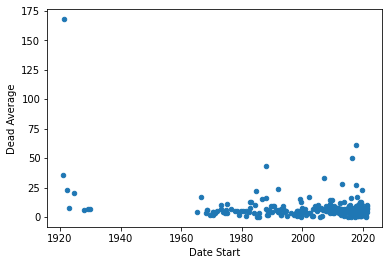

In [460]:
cleaned_shootings.plot(kind='scatter',x='Date Start', y='Dead Average')

In [ ]:
#notes: I'm probably going to ignore these as I go
# - n1 in dead includes shooter, put in another column
# -nX in dead includes non-shooting related ( stabbing )- on the fence
# Dates - dates spanning multiple days will be limited to the start date
# location will get split to city / state as new columns
# where there is a range specified, the lowest of that range will be used 
# total is kind of not needed since I'm doing the averages. felt cute, thought I'd keep for now